In [1]:
%matplotlib notebook

import numpy as np

# ICEWS Networks During the Obama Administration (2009 - 2016)

Conditioned on the model parameters, the latent space model assumes dyads form as independent Bernoulli random variables with connection probability

$$
\text{logit}\left[\mathbb{P}(Y_{ijt}^k = 1)\right] = \delta_k^i + \delta_k^j + \mathbf{X}_t^{i\, \rm T} \Lambda_k \mathbf{X}_t^{j}
$$

The $\delta_k^i$ are 'sociability' parameters. These account for degree heterogeneity in the network.

## 4 Layers, 96 time-stamps (monthly), 65 nodes, 20% of dyads held-out of each network

In [2]:
from multidynet.datasets import load_icews
from multidynet.plots import plot_network
from multidynet.model_selection import train_test_split

Y, countries, layer_labels = load_icews()

# Hold-out 20% of dyads for testing
Y_train, test_indices = train_test_split(Y, test_size=0.2, random_state=42)

In [3]:
import joblib

# model = joblib.load(open('icews-model_2009-2017_n65_h20_i10.pkl', 'rb'))
model = joblib.load(open('icews-model_2009-2017_symmetric.pkl', 'rb'))

# Goodness-of-Fit

<IPython.core.display.Javascript object>


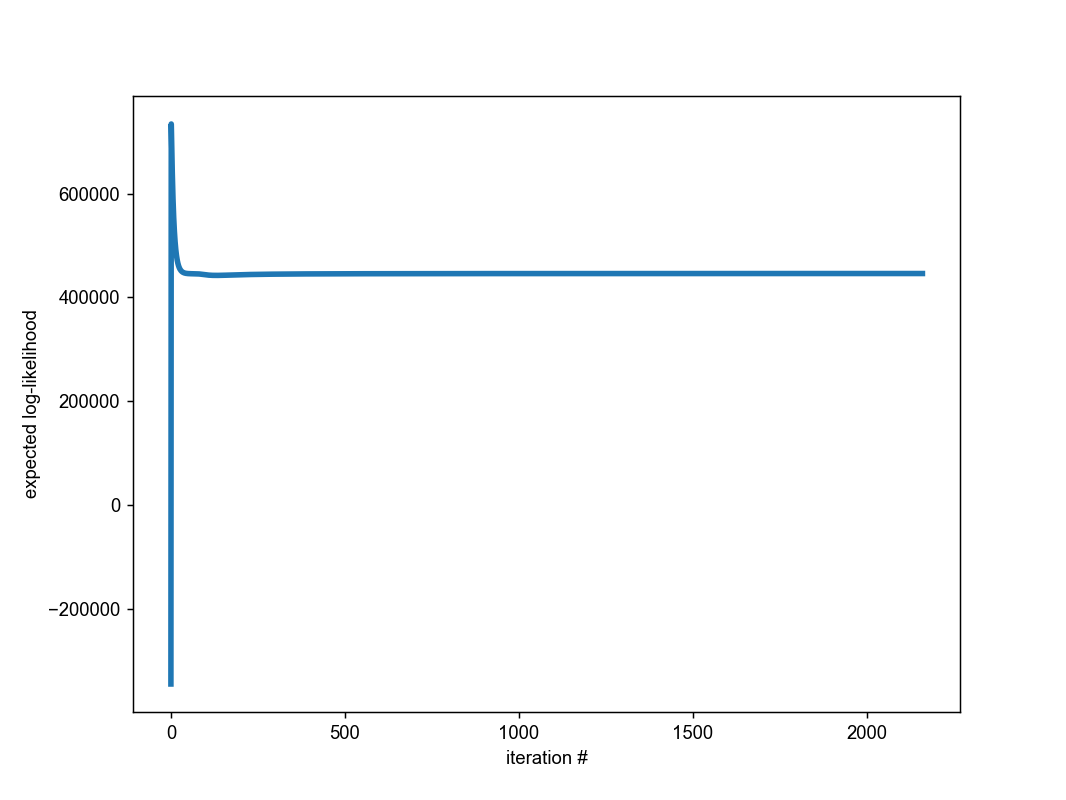

Text(0.5, 0, 'iteration #')

In [4]:
fig, ax= plt.subplots(figsize=(8, 6))
ax.plot(model.logp_, lw=3)
ax.set_ylabel('expected log-likelihood')
ax.set_xlabel('iteration #')

In [5]:
model.auc_

0.8811279139608141

In [6]:
from multidynet.metrics import calculate_auc

calculate_auc(Y, model.probas_, test_indices)

0.8774950722484589

# Country Sociability

<IPython.core.display.Javascript object>


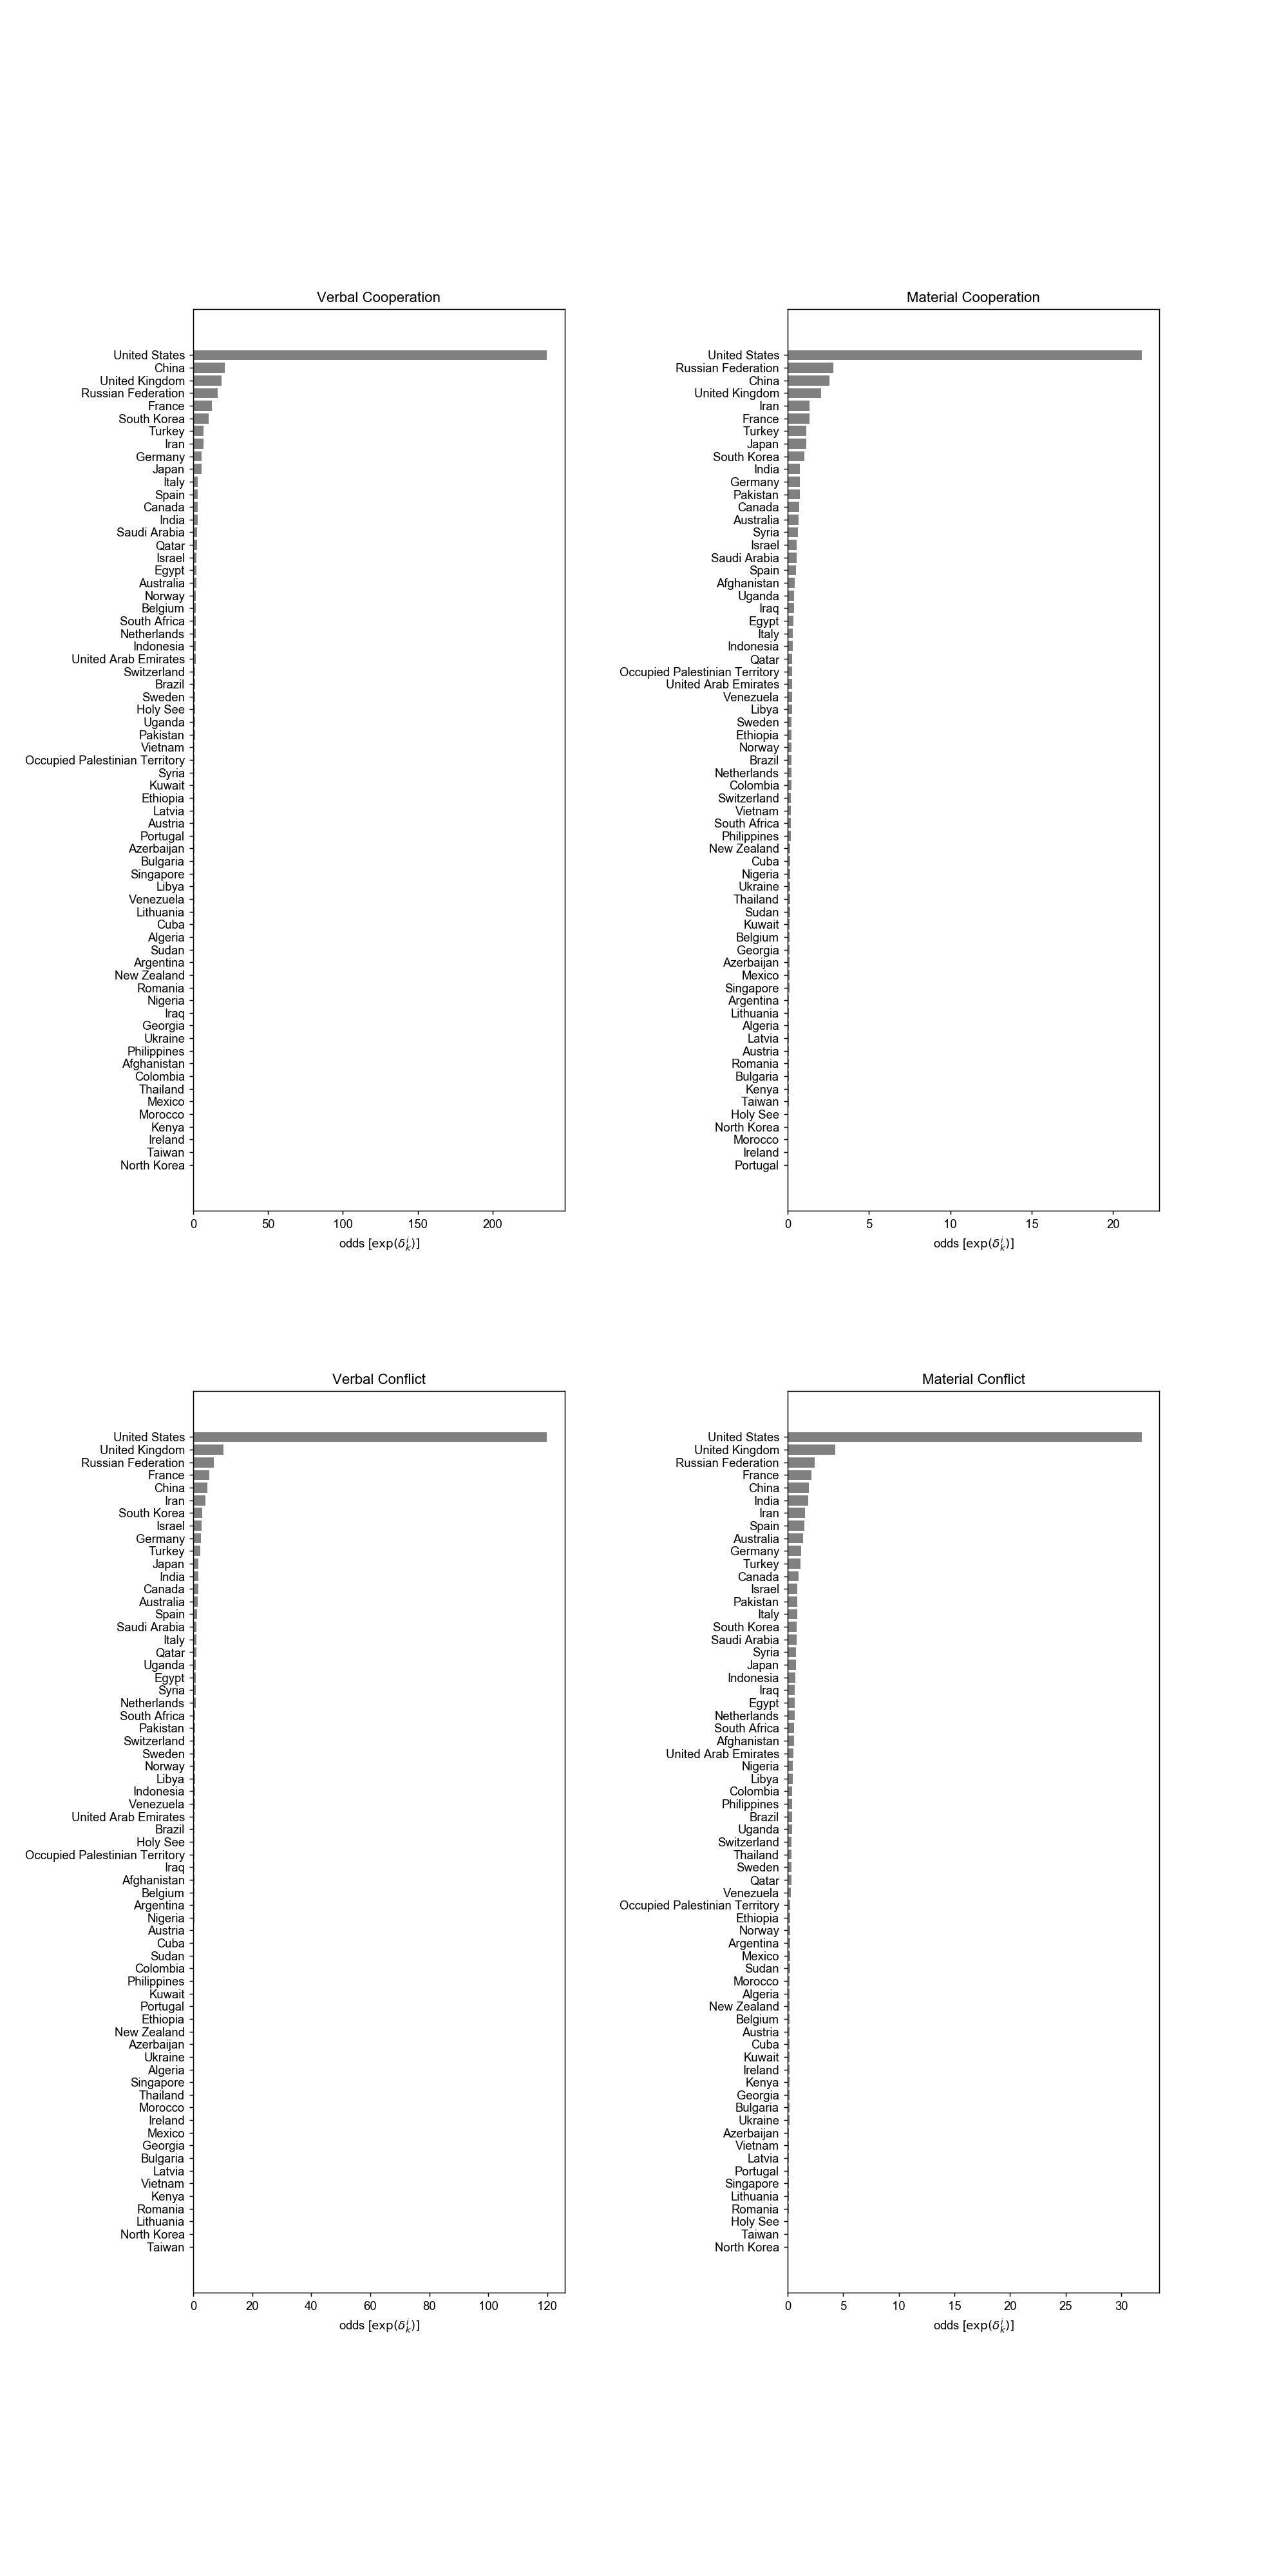

In [7]:
from multidynet.plots import plot_sociability


fig, axes = plt.subplots(2, 2, figsize=(15, 30), dpi=100)
for k, ax in enumerate(axes.flat):
    plot_sociability(model, k=k, node_labels=countries, ax=ax, layer_label=layer_labels[k])

fig.subplots_adjust(wspace=0.6, left=0.15)

# Assortativity Parameters

<IPython.core.display.Javascript object>


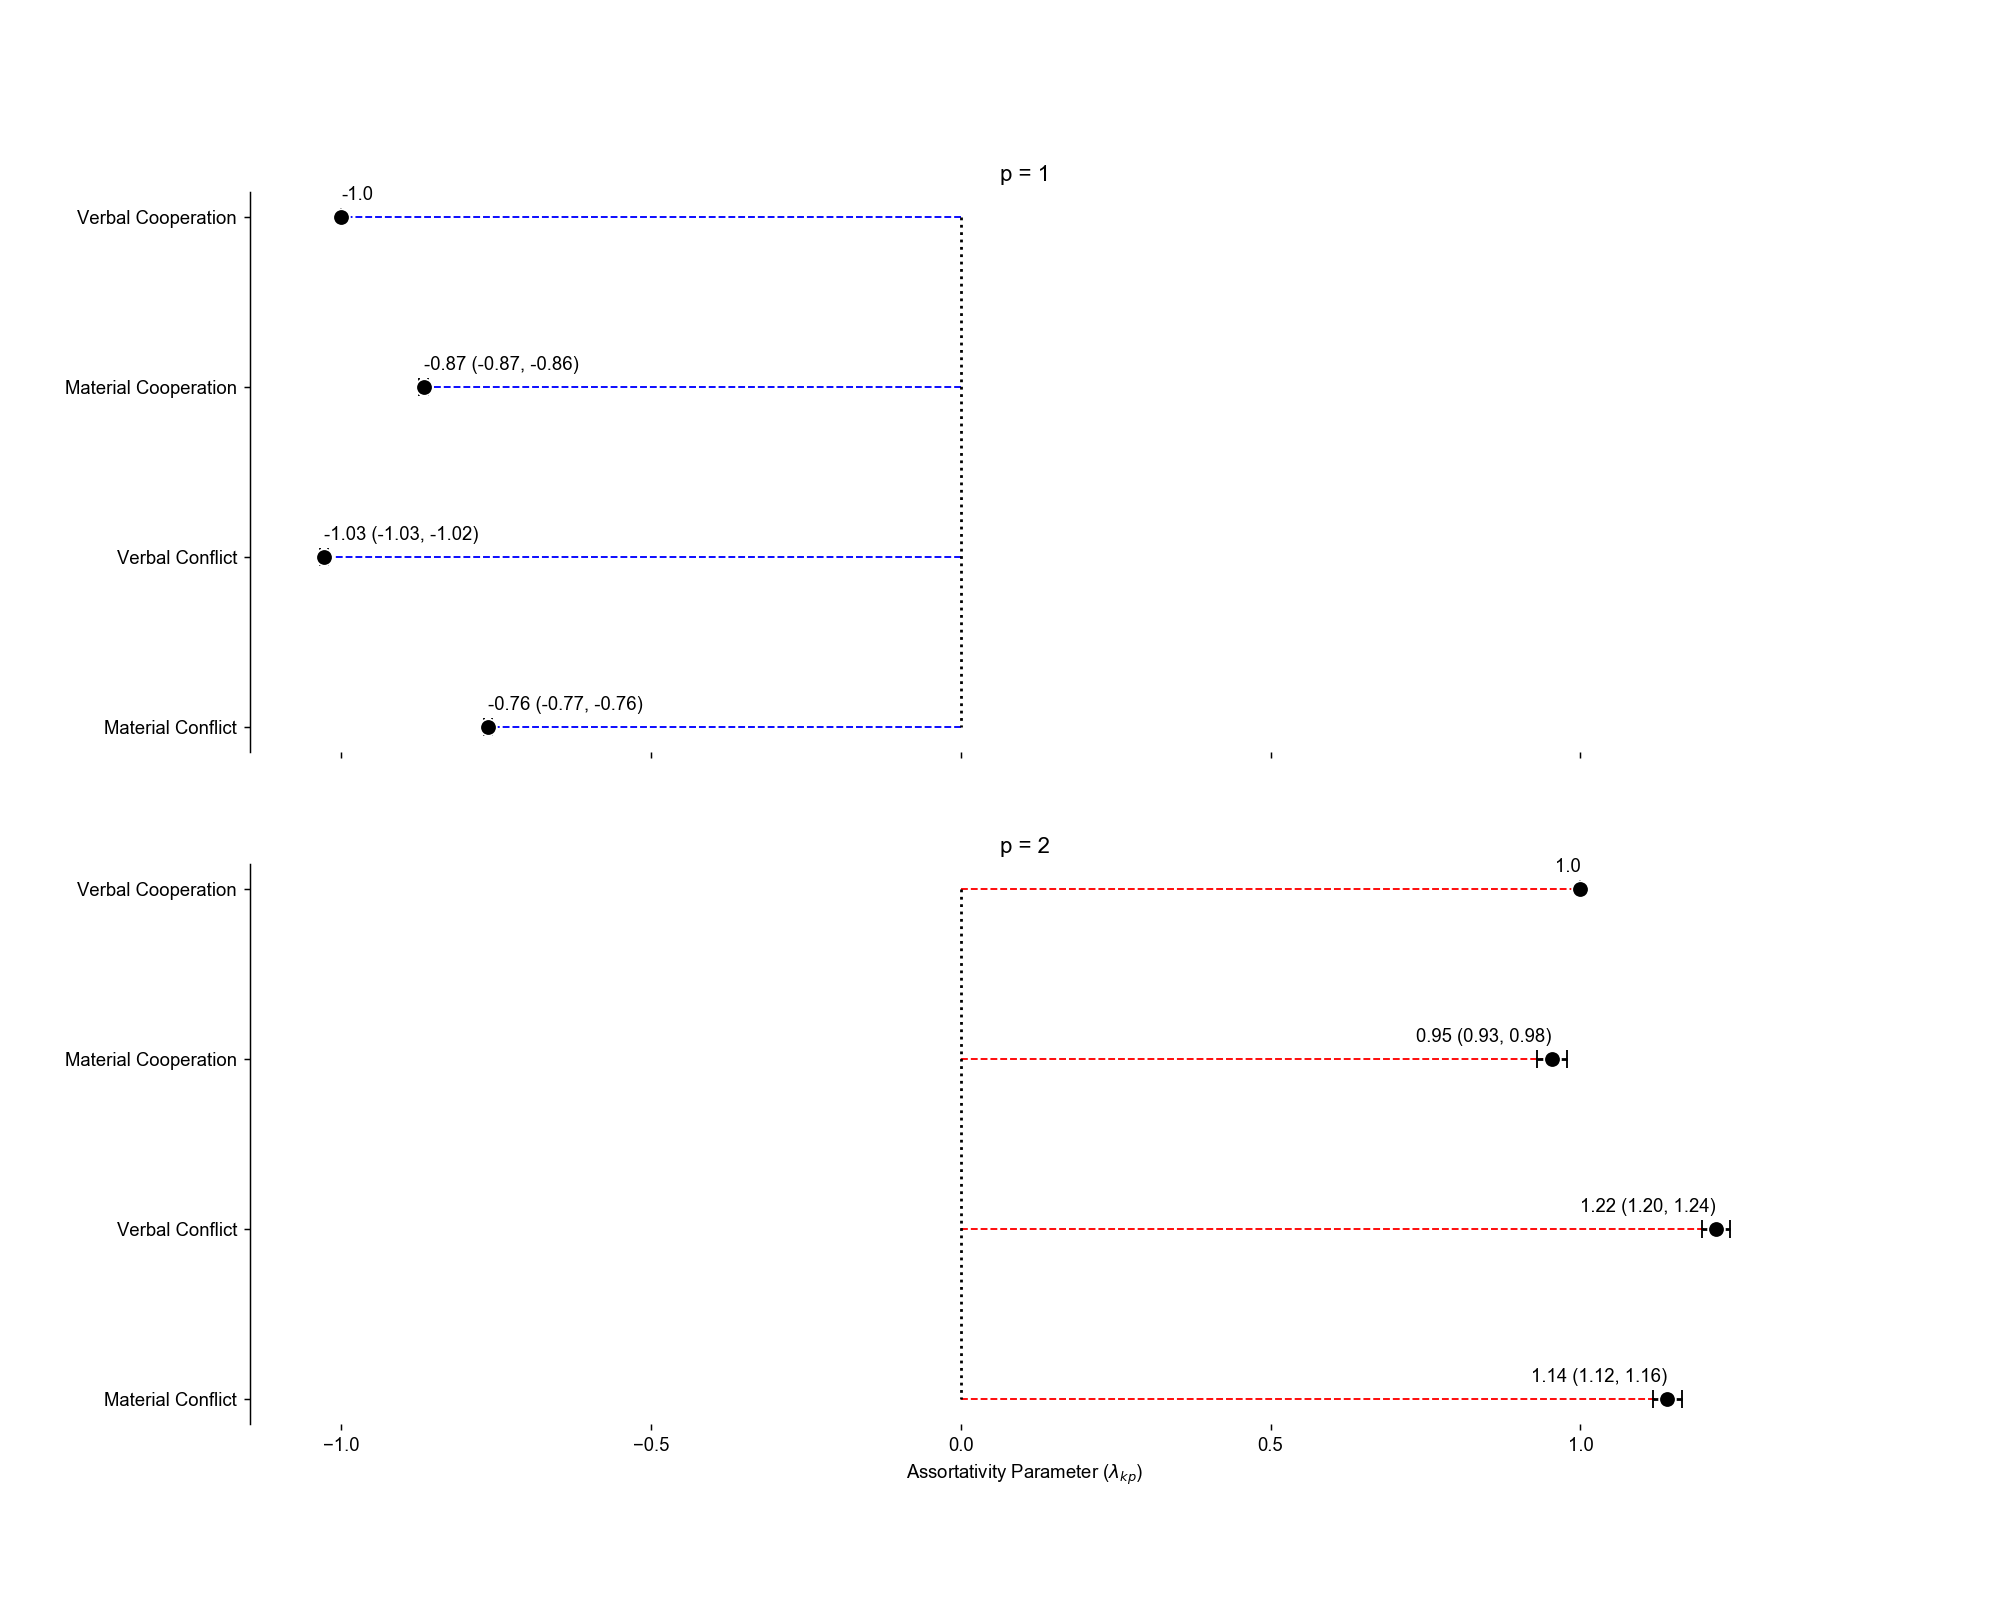

In [8]:
from multidynet.plots import plot_lambda

axes = plot_lambda(model, q_alpha=0.05, layer_labels=layer_labels, figsize=(15, 12))

# Latent Space

<IPython.core.display.Javascript object>


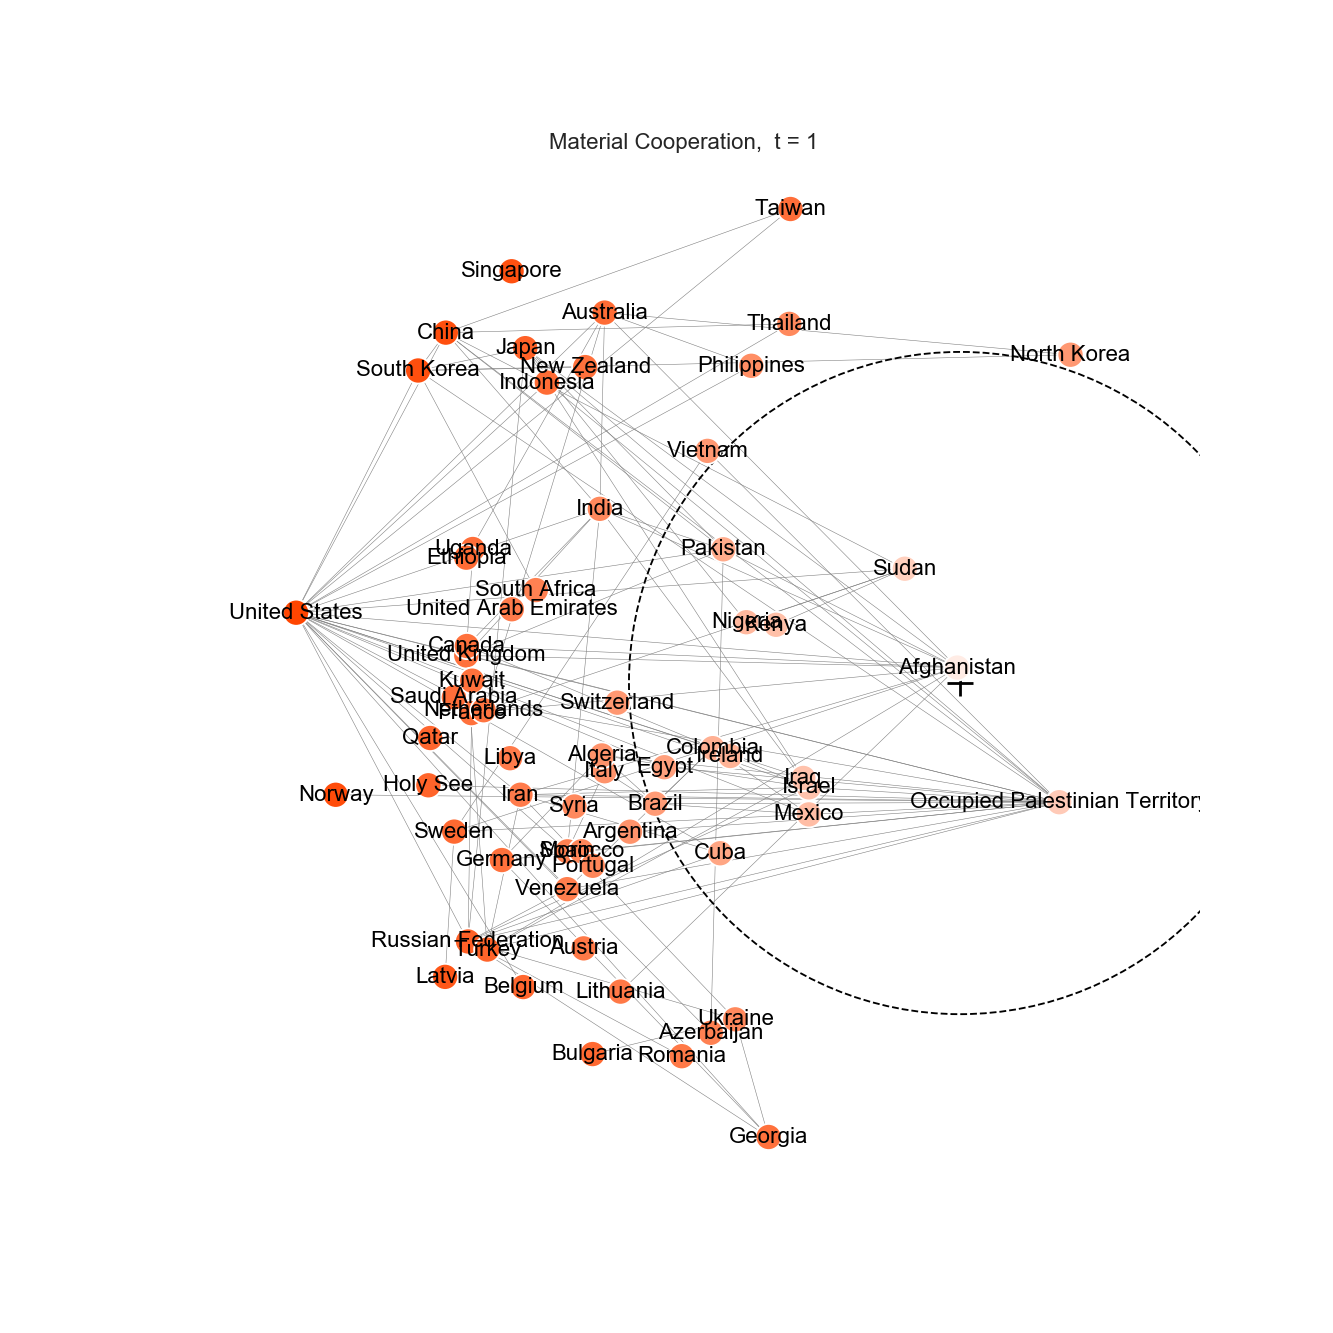

Text(0.5, 1.0, 'Material Cooperation,  t = 1')

In [9]:
from multidynet.plots import plot_network, normal_contour

t = 0
k = 1

ax = plot_network(Y[k, t], model.X_[t], tau_sq=model.tau_sq_, normalize=False, node_labels=countries,
                  size=200, with_labels=True, font_size=12, 
                  edge_width=0.3, figsize=(10, 10))
ax.set_title('{},  t = {}'.format(layer_labels[k], t+1))

# Ukraine - US - Russia Relations (2014 Crimean Crisis)

<IPython.core.display.Javascript object>


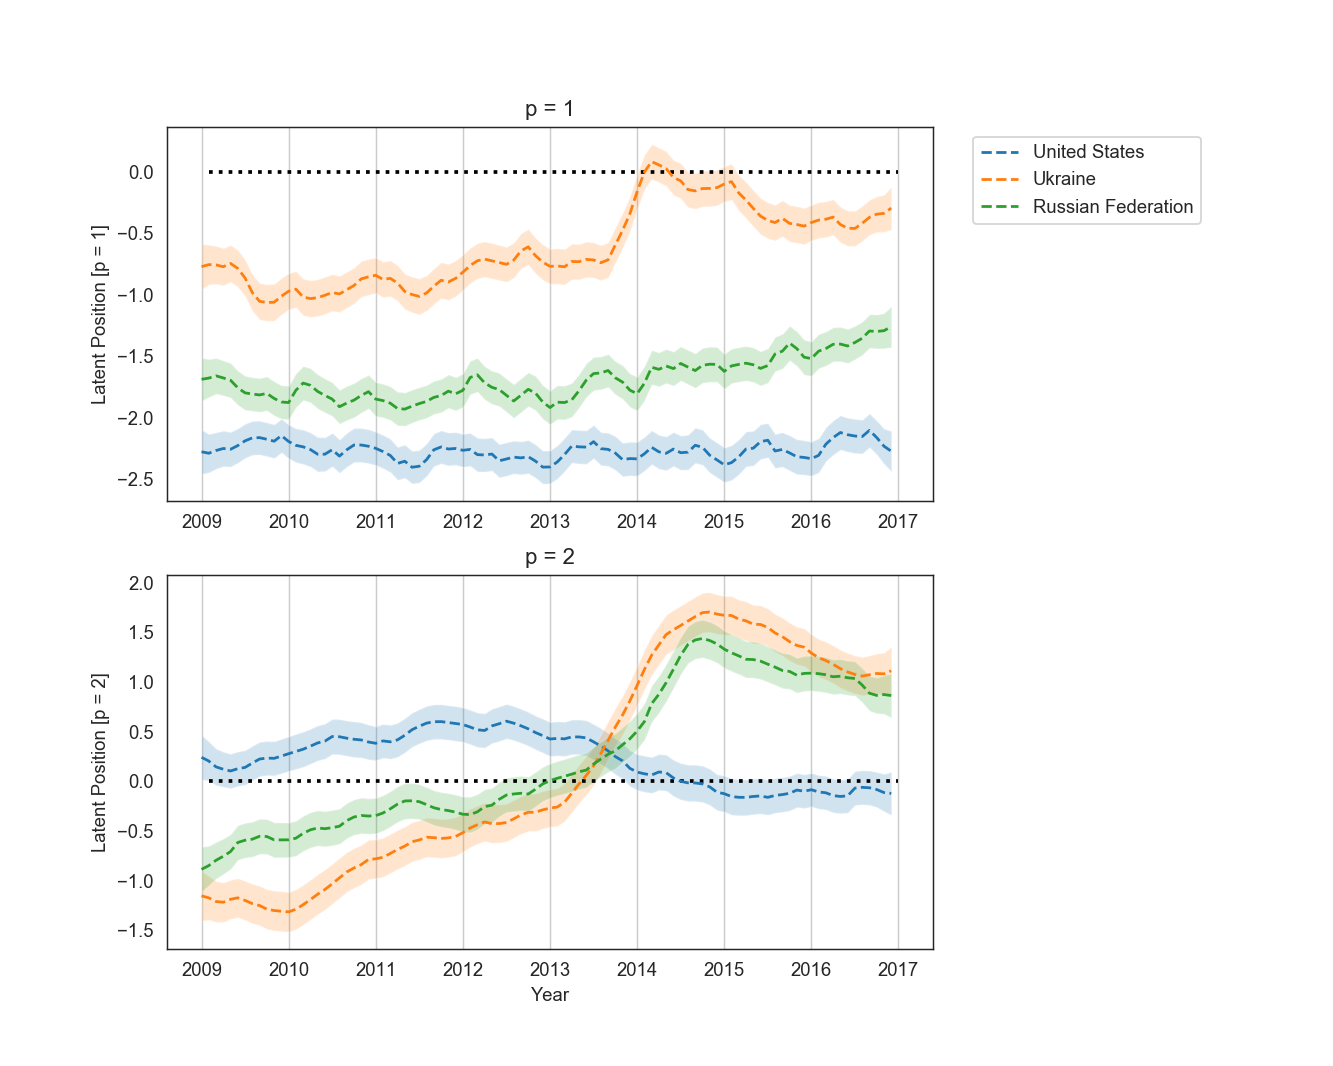

Text(0.5, 0, 'Year')

In [10]:
from multidynet.plots import plot_node_trajectories

ax = plot_node_trajectories(model, ['United States', 'Ukraine', 'Russian Federation'],
                            node_labels=countries, q_alpha=0.05, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(9)])
    ax[p].set_xticklabels([2009 + i for i in range(9)])
    ax[p].grid(axis='x')
ax[-1].set_xlabel('Year')

Means and confidence bands are obtained by sampling from the approximate posterior and calculating the $1-\alpha$ quantile region

<IPython.core.display.Javascript object>


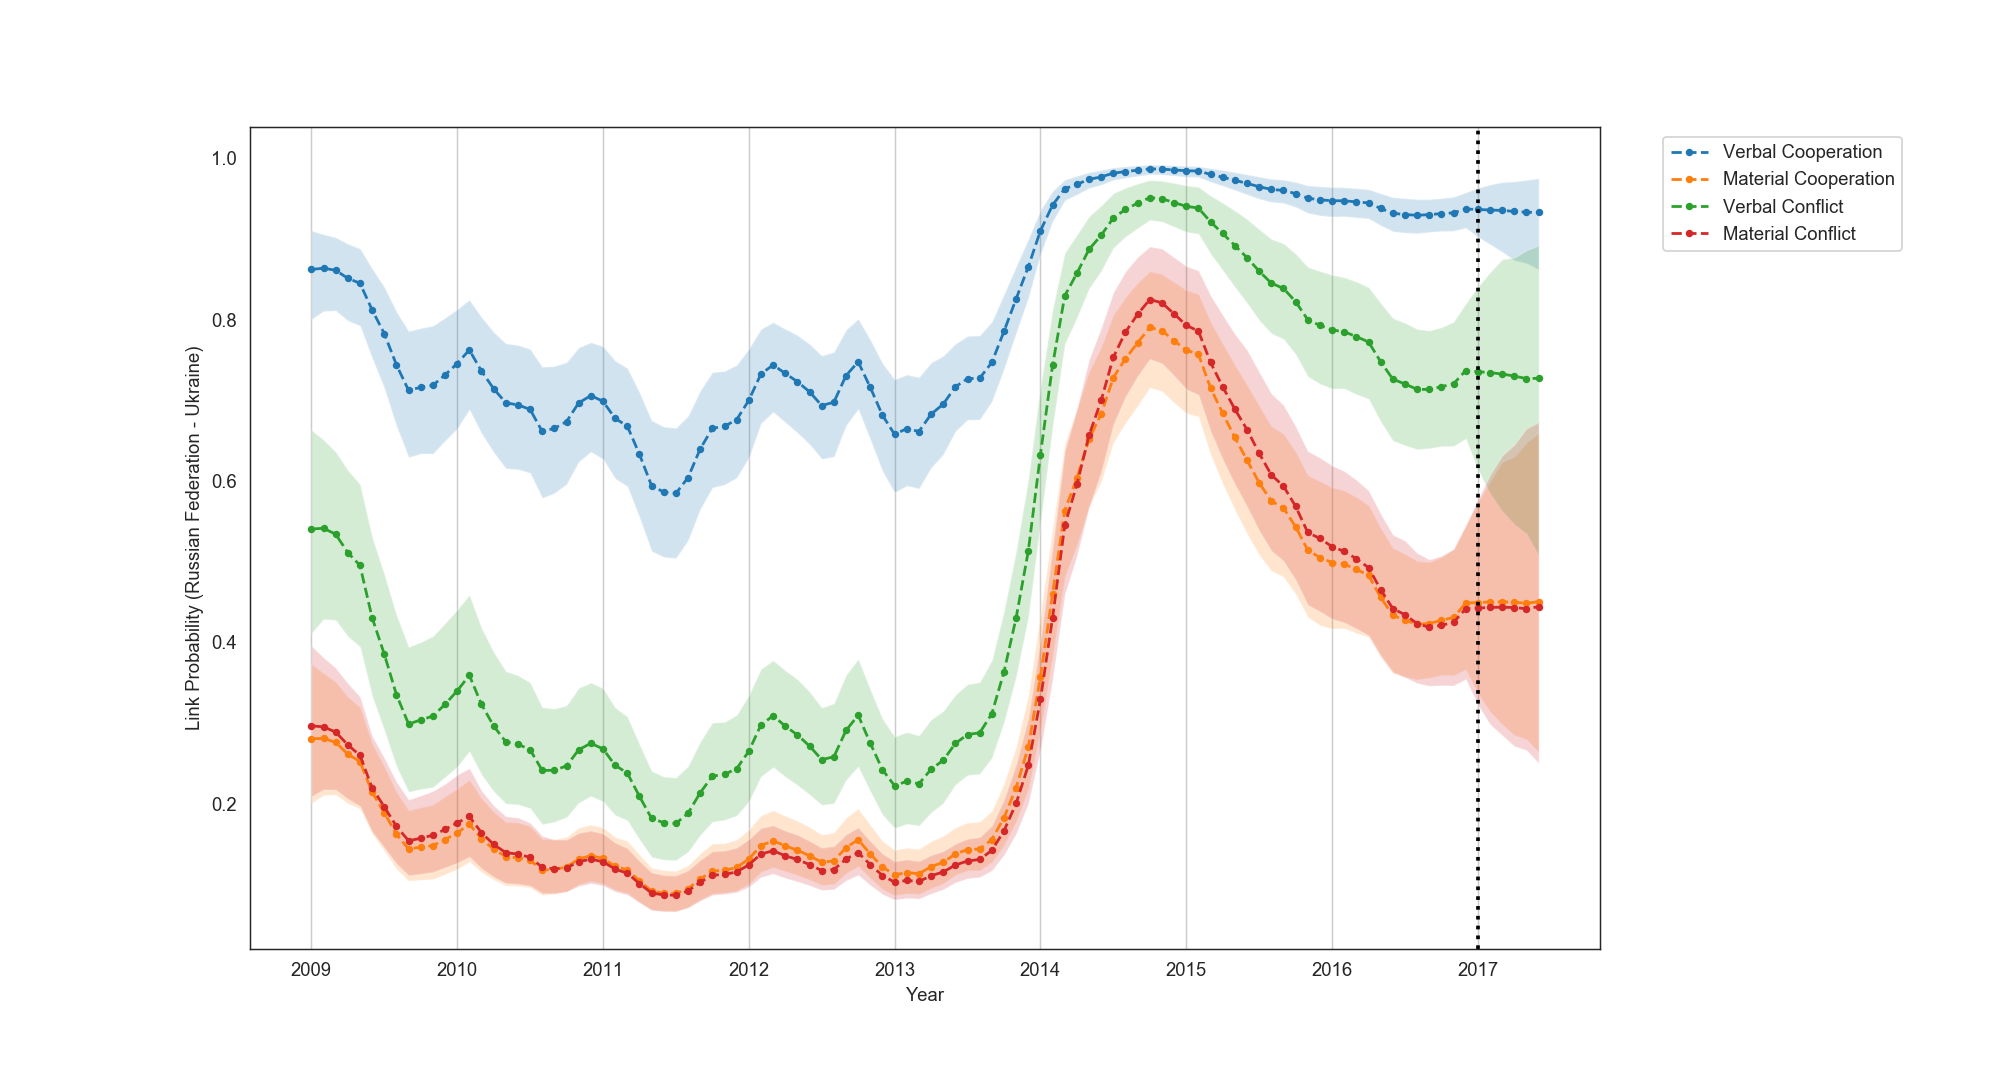

In [11]:
from multidynet.plots import plot_pairwise_probabilities

horizon = 6
fig, ax = plot_pairwise_probabilities(model, 'Russian Federation', 'Ukraine', horizon=horizon, 
                                      node_labels=countries, 
                                      linestyle='.--', figsize=(15, 8),
                                      layer_labels=layer_labels)


ax.set_xticks([i * 12 for i in range(9)])
ax.set_xticklabels([2009 + i for i in range(9)])
ax.grid(axis='x')
ax.set_xlabel('Year')

if horizon > 0:
    ax.axvline(8 * 12, 0, 1, color='k', linestyle='dotted', lw=2)

fig.subplots_adjust(right=0.8)

# Libya - US Relations (2011 Beginning of Arab Spring)

<IPython.core.display.Javascript object>


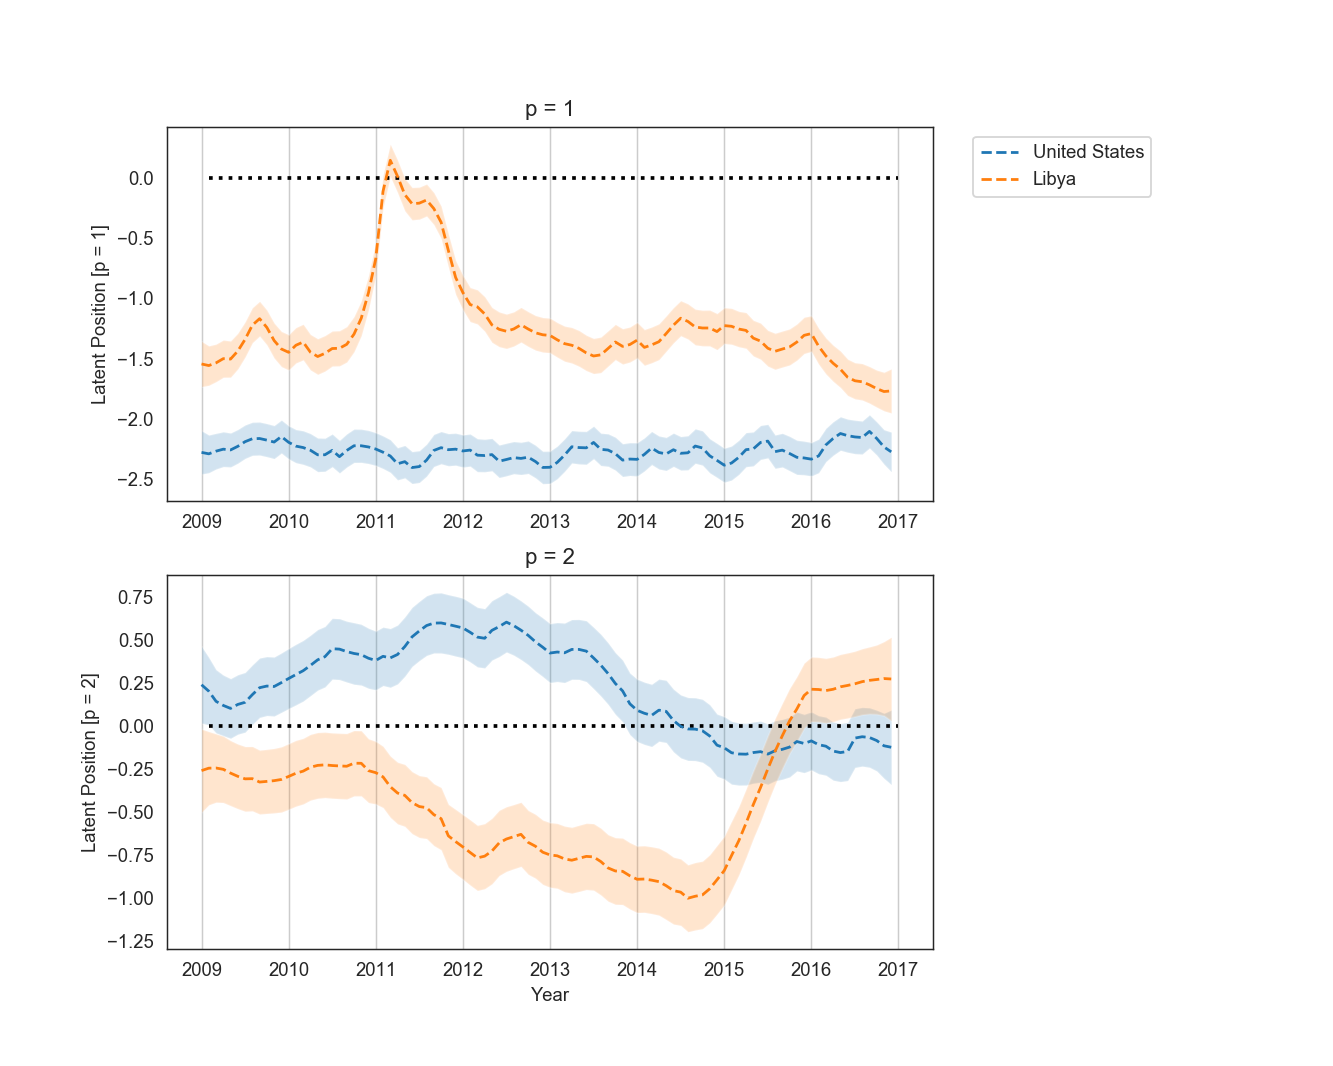

Text(0.5, 0, 'Year')

In [12]:
from multidynet.plots import plot_node_trajectories

sns.set_style('white')
ax = plot_node_trajectories(model, ['United States', 'Libya'],
                            node_labels=countries, q_alpha=0.05, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(9)])
    ax[p].set_xticklabels([2009 + i for i in range(9)])
    ax[p].grid(axis='x')
    
ax[-1].set_xlabel('Year')

<IPython.core.display.Javascript object>


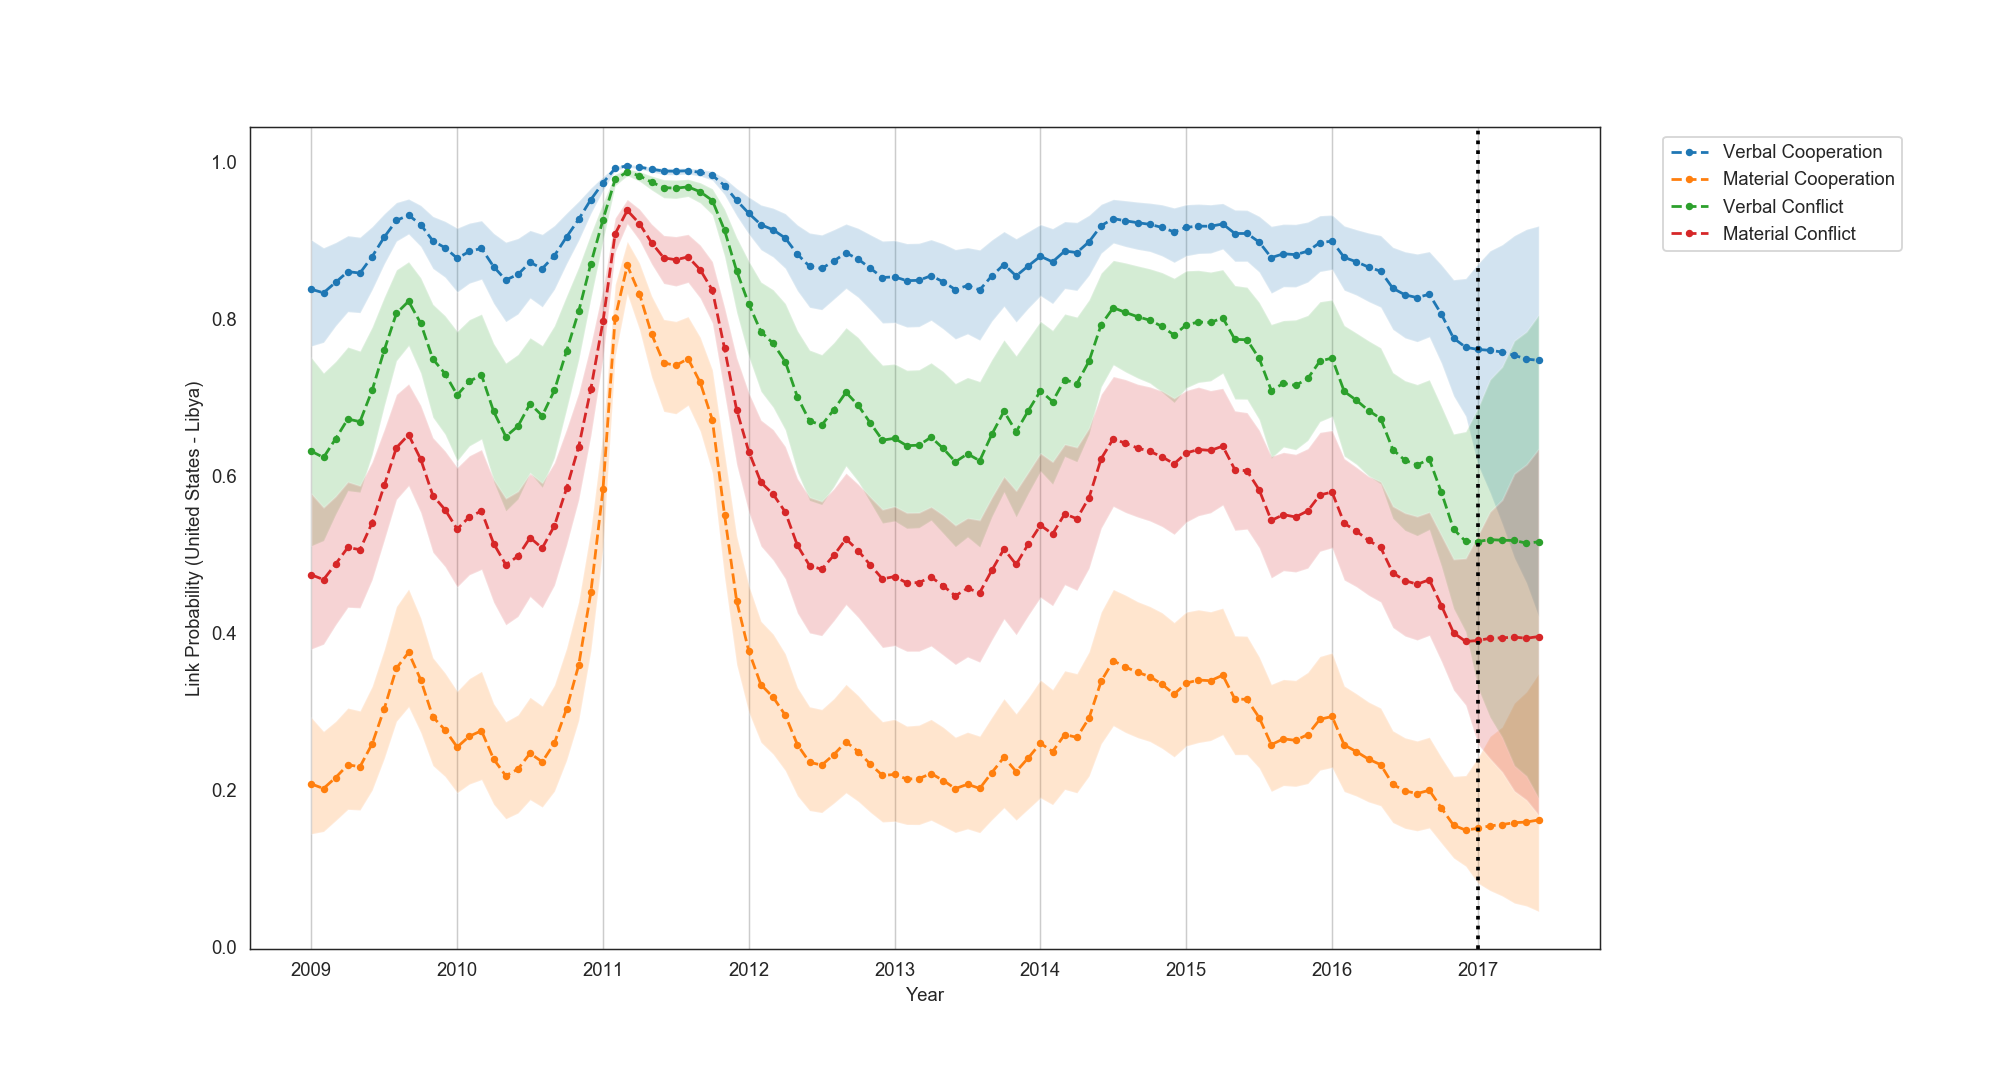

In [13]:
from multidynet.plots import plot_pairwise_probabilities

horizon = 6

fig, ax = plot_pairwise_probabilities(model, 'United States', 'Libya', horizon=horizon,
                                      node_labels=countries, layer_labels=layer_labels,
                                      linestyle='.--', figsize=(15, 8))

ax.set_xticks([i * 12 for i in range(9)])
ax.set_xticklabels([2009 + i for i in range(9)])
ax.grid(axis='x')
ax.set_xlabel('Year')

if horizon > 0:
    ax.axvline(8 * 12, 0, 1, color='k', linestyle='dotted', lw=2)

fig.subplots_adjust(right=0.8)

# Iraq - US Relations (2014 US Intervention in Iraq against ISIL)

<IPython.core.display.Javascript object>


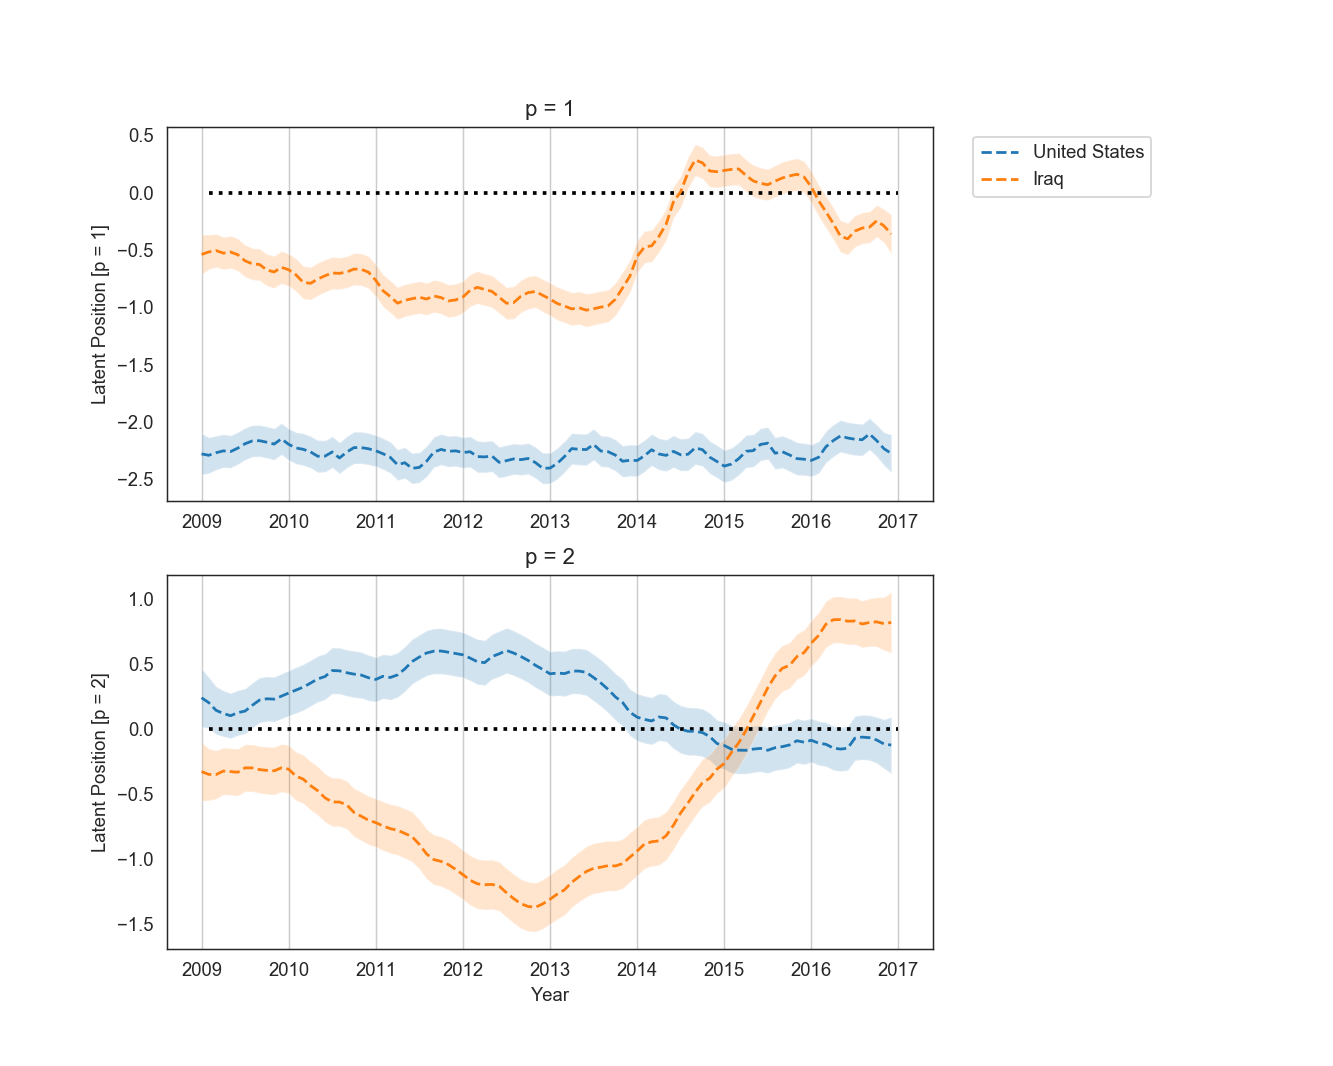

Text(0.5, 0, 'Year')

In [14]:
from multidynet.plots import plot_node_trajectories

sns.set_style('white')
ax = plot_node_trajectories(model, ['United States', 'Iraq'],
                            node_labels=countries, q_alpha=0.05, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(9)])
    ax[p].set_xticklabels([2009 + i for i in range(9)])
    ax[p].grid(axis='x')
    
ax[-1].set_xlabel('Year')

<IPython.core.display.Javascript object>


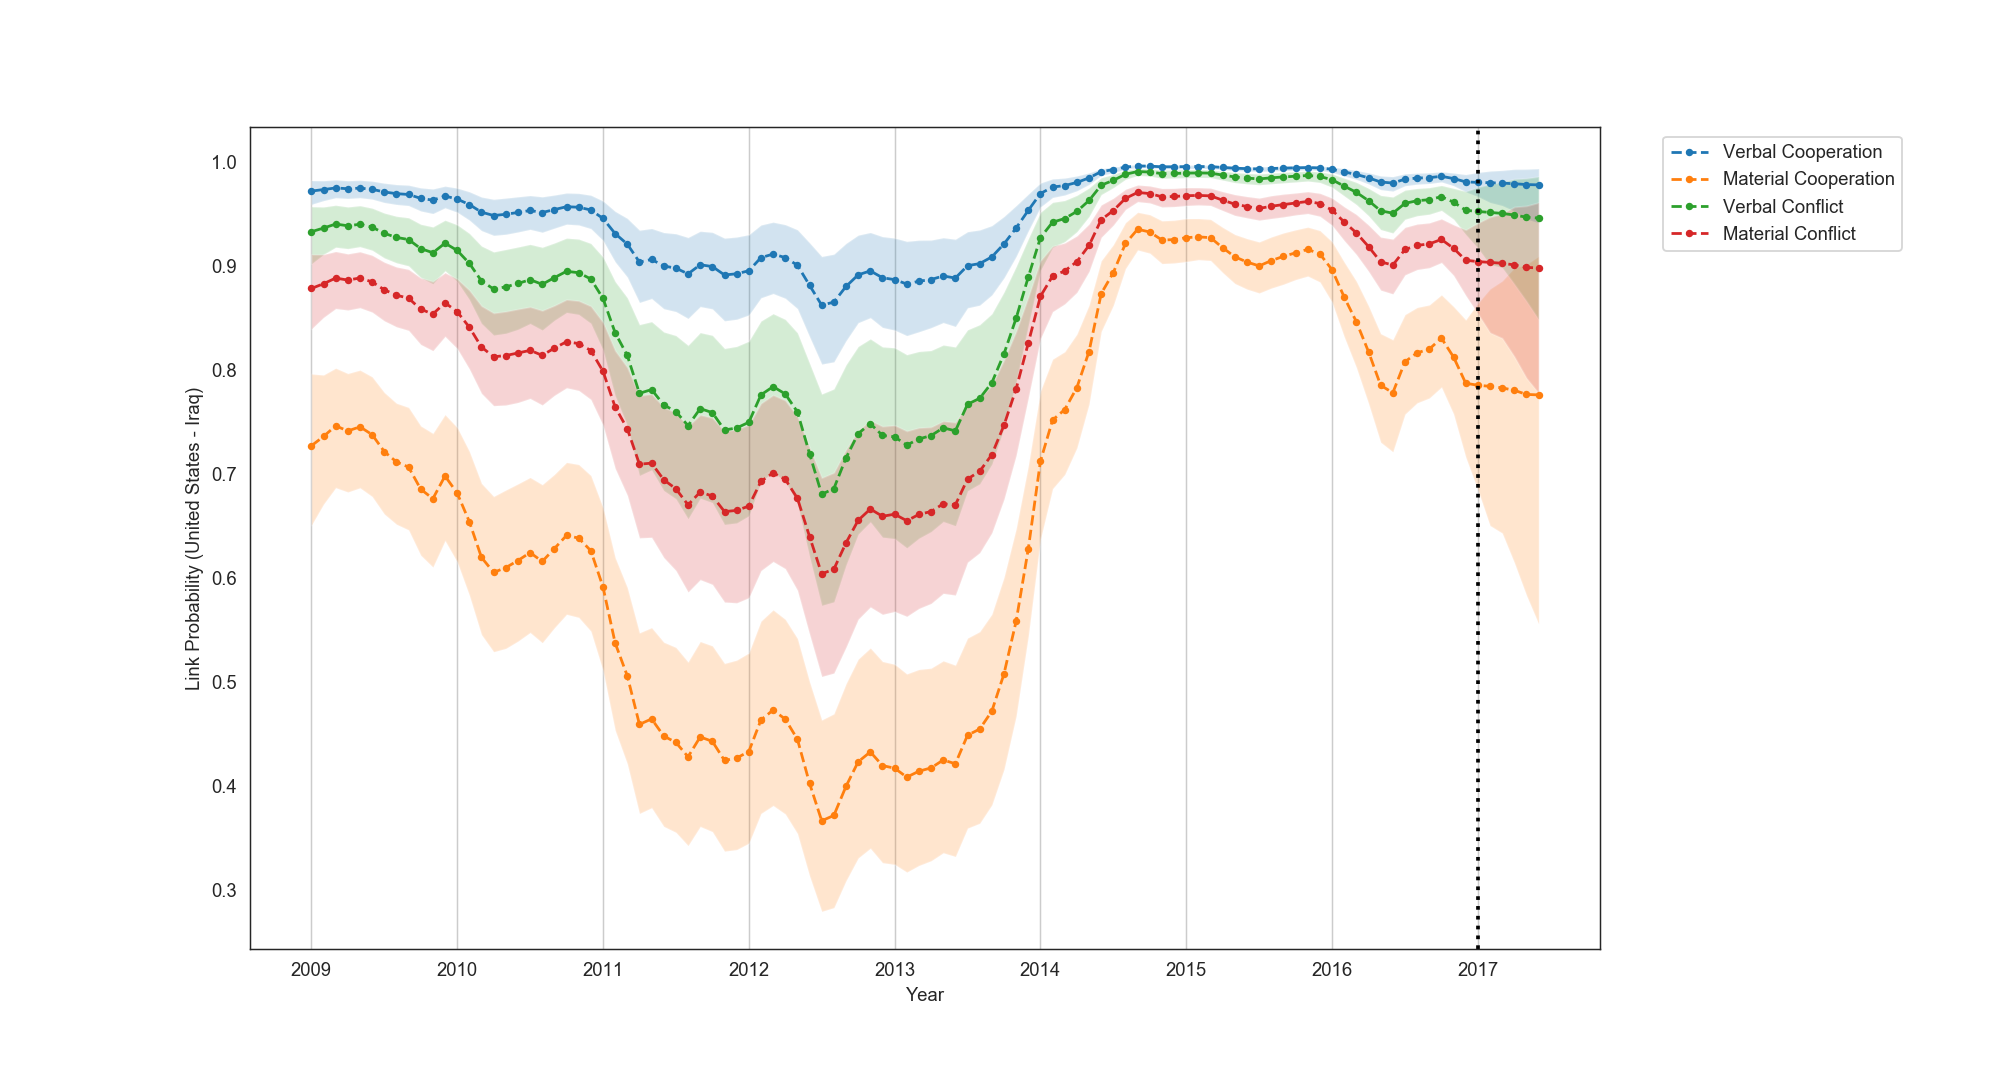

In [15]:
from multidynet.plots import plot_pairwise_probabilities

horizon = 6
fig, ax = plot_pairwise_probabilities(model, 'United States', 'Iraq', horizon=horizon, 
                                      node_labels=countries, 
                                      layer_labels=layer_labels,
                                      linestyle='.--', figsize=(15, 8))


ax.set_xticks([i * 12 for i in range(9)])
ax.set_xticklabels([2009 + i for i in range(9)])
ax.grid(axis='x')
ax.set_xlabel('Year')

if horizon > 0:
    ax.axvline(8 * 12, 0, 1, color='k', linestyle='dotted', lw=2)

fig.subplots_adjust(right=0.8)